In [228]:
import pandas as pd
import csv

In [229]:
df=pd.read_csv('C:\\Users\\Judah.Chisare\\Desktop\\hospital_data.csv')
df.head()

Date  Medication Revenue    Lab Cost   Consultation Revenue   \
0  11/4/2019 0:00           $1,183.22      $10.00                 $20.17    
1  11/6/2019 0:00             $738.48        $-                   $15.00    
2  11/2/2019 0:00             $660.00        $-                   $21.17    
3  11/6/2019 0:00             $600.00        $-                     $-      
4  11/1/2019 0:00             $591.60        $-                   $12.00    

  Doctor Type Financial Class Patient Type Entry Time Post-Consultation Time  \
0      ANCHOR             HMO   OUTPATIENT    8:35:45                9:17:54   
1      ANCHOR       INSURANCE   OUTPATIENT   19:19:16               21:02:36   
2      ANCHOR             HMO   OUTPATIENT   10:46:52               11:56:25   
3      ANCHOR        MEDICARE   OUTPATIENT    9:38:34               10:55:50   
4      ANCHOR       INSURANCE   OUTPATIENT   11:16:21               12:06:49   

  Completion Time     Doctor Patient ID  
0         9:29:46  DR05350C4     C10001  
1        21:24:07  DR09451Z4     C10002  
2        12:06:28  DR17400I4     C10003  
3        10:58:02  DR09451Z4     C10004  
4        12:06:54  DR15154H4     C10005

In [230]:
#converting all date fields to datetime datatype

df['Date'] = pd.to_datetime(df['Date'])
df['Entry Time'] = pd.to_datetime(df['Entry Time'])
df['Post-Consultation Time'] = pd.to_datetime(df['Post-Consultation Time'])
df['Completion Time'] = pd.to_datetime(df['Completion Time'])


In [231]:
df.dtypes

Date                      datetime64[ns]
 Medication Revenue               object
  Lab Cost                        object
 Consultation Revenue             object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [232]:
df.columns = df.columns.str.strip()
df.columns

Index(['Date', 'Medication Revenue', 'Lab Cost', 'Consultation Revenue',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [233]:
def clean_text(x):
    x = x.replace('$','')
    x = x.replace(',','')
    x = x.replace('-','')
    x = x.replace(' ','')
    x = pd.to_numeric(x)
    return x

df['Medication Revenue']=df['Medication Revenue'].apply(clean_text)
df['Lab Cost']=df['Lab Cost'].apply(clean_text)
df['Consultation Revenue']=df['Consultation Revenue'].apply(clean_text)
df=df.fillna(0)
df.head()

Date  Medication Revenue  Lab Cost  Consultation Revenue Doctor Type  \
0 2019-11-04             1183.22      10.0                 20.17      ANCHOR   
1 2019-11-06              738.48       0.0                 15.00      ANCHOR   
2 2019-11-02              660.00       0.0                 21.17      ANCHOR   
3 2019-11-06              600.00       0.0                  0.00      ANCHOR   
4 2019-11-01              591.60       0.0                 12.00      ANCHOR   

  Financial Class Patient Type          Entry Time Post-Consultation Time  \
0             HMO   OUTPATIENT 2021-03-10 08:35:45    2021-03-10 09:17:54   
1       INSURANCE   OUTPATIENT 2021-03-10 19:19:16    2021-03-10 21:02:36   
2             HMO   OUTPATIENT 2021-03-10 10:46:52    2021-03-10 11:56:25   
3        MEDICARE   OUTPATIENT 2021-03-10 09:38:34    2021-03-10 10:55:50   
4       INSURANCE   OUTPATIENT 2021-03-10 11:16:21    2021-03-10 12:06:49   

      Completion Time     Doctor Patient ID  
0 2021-03-10 09:29:46  DR05350C4     C10001  
1 2021-03-10 21:24:07  DR09451Z4     C10002  
2 2021-03-10 12:06:28  DR17400I4     C10003  
3 2021-03-10 10:58:02  DR09451Z4     C10004  
4 2021-03-10 12:06:54  DR15154H4     C10005

In [234]:
df.dtypes

Date                      datetime64[ns]
Medication Revenue               float64
Lab Cost                         float64
Consultation Revenue             float64
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [235]:

df['total revenue']=df[['Medication Revenue','Lab Cost','Consultation Revenue']].sum(axis=1)

In [218]:

df.head()

Date  Medication Revenue  Lab Cost  Consultation Revenue Doctor Type  \
0 2019-11-04             1183.22      10.0                 20.17      ANCHOR   
1 2019-11-06              738.48       0.0                 15.00      ANCHOR   
2 2019-11-02              660.00       0.0                 21.17      ANCHOR   
3 2019-11-06              600.00       0.0                  0.00      ANCHOR   
4 2019-11-01              591.60       0.0                 12.00      ANCHOR   

  Financial Class Patient Type          Entry Time Post-Consultation Time  \
0             HMO   OUTPATIENT 2021-03-10 08:35:45    2021-03-10 09:17:54   
1       INSURANCE   OUTPATIENT 2021-03-10 19:19:16    2021-03-10 21:02:36   
2             HMO   OUTPATIENT 2021-03-10 10:46:52    2021-03-10 11:56:25   
3        MEDICARE   OUTPATIENT 2021-03-10 09:38:34    2021-03-10 10:55:50   
4       INSURANCE   OUTPATIENT 2021-03-10 11:16:21    2021-03-10 12:06:49   

      Completion Time     Doctor Patient ID  total revenue  
0 2021-03-10 09:29:46  DR05350C4     C10001        1213.39  
1 2021-03-10 21:24:07  DR09451Z4     C10002         753.48  
2 2021-03-10 12:06:28  DR17400I4     C10003         681.17  
3 2021-03-10 10:58:02  DR09451Z4     C10004         600.00  
4 2021-03-10 12:06:54  DR15154H4     C10005         603.60

## 1. WHAT TIME HAS THE MOST VISITORS

In [236]:
df['entry_hour']=df['Entry Time'].dt.hour
df5=df.groupby('entry_hour')['Patient ID'].count()


df5.head(17)

entry_hour
7       12
8     3489
9     4297
10    3680
11    3306
12    1446
13     426
14    3030
15    1847
16    1249
17     219
18    2600
19    2269
20    1358
21     500
22     238
23      33
Name: Patient ID, dtype: int64

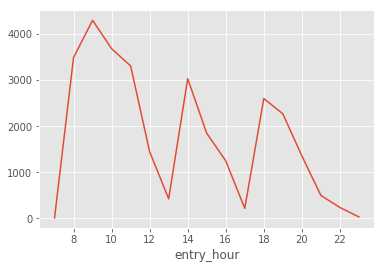

In [237]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df1=df.groupby('entry_hour')['Patient ID'].count().plot()



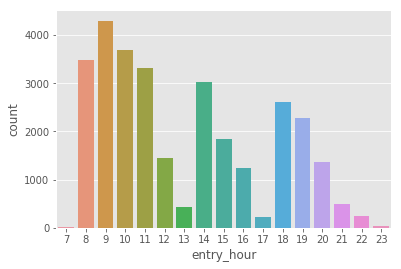

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['entry_hour'])
plt.show()

## 2. TOTAL REVENUE PER HOUR

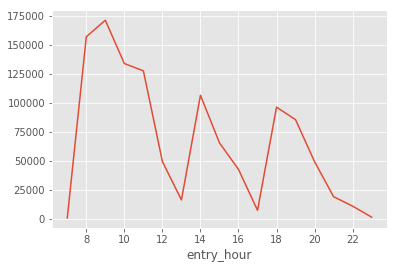

In [239]:
df3=df.groupby('entry_hour')['total revenue'].sum().plot()


## 3.  What percentage of revenue come from different Insurance types

In [240]:
df4 = df.groupby('Financial Class').sum()

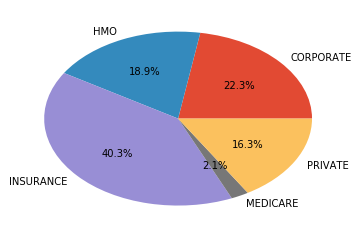

In [245]:
plt.pie(df4['total revenue'],labels=df4.index,autopct='%1.1f%%');